#  Machine learning model to predict passenger survival on the Titanic

## `Step 1: Get the data`

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline 

data = pd.read_csv('../data/train.csv')
data.shape

(891, 12)

## `Step 2: Exploratory data analysis` 
This step is in an additional notebook: __Exploratory_Data_Analysis_Titanic.ipynb__

## `Step 3. Feature engineering`

Using **feature engineering** approaches make the data easy to understand for a model. 
Variables that may properly describing your model and fitting to the data. 


In [49]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 3.1 One hot encoded features
* who (title)
* embarked
* Cabin

In [120]:
def cabin_names(dataframe, data_type):
    """
    Hoteconodes the cabin names

    Parameters:
    dataframe: Data from the Titanic dataset. Either training or test data
    data_type: training set, testing set
    ----------
    """

    dataframe['Embarked'] = dataframe['Embarked'].replace(to_replace = 'C',
                            value = int(0), regex =True)
    dataframe['Embarked'] = dataframe['Embarked'].replace(to_replace = 'S',
                            value = int(1), regex =True)
    dataframe['Embarked'] = dataframe['Embarked'].replace(to_replace = 'Q',
                            value = int(2), regex =True)
    dataframe['Cabin'] = dataframe['Cabin'].fillna(0).astype(str).str[0]
    onehot = pd.get_dummies(dataframe['Cabin'])
    if data_type == "training":
        onehot.columns = ['unk_Cabin', 'Cabin_A','Cabin_B','Cabin_C', \
                          'Cabin_D', 'Cabin_E', 'Cabin_F','Cabin_G', 'Cabin_T']
        dataframe = pd.concat([dataframe, onehot], axis = 1)
    else:
        onehot.columns = ['unk_Cabin', 'Cabin_A','Cabin_B','Cabin_C', \
                          'Cabin_D', 'Cabin_E', 'Cabin_F','Cabin_G']
        dataframe = pd.concat([dataframe, onehot], axis = 1)
    return dataframe

In [51]:
data = cabin_names(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,unk_Cabin,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1.0,1,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,1,0,0,0,0,0,0,0,0


In [52]:

def name_to_titles(dataframe):
    """
    Hotecondes names of passengers to only their title

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Capt.*',
                        '\.*.*Countess.*',  '\.*.*Lady.*', '\.*.*Col.*',
                        '\.*.*Dr.*', '\.*.*Don.*', '\.*.*Major.*',
                        '\.*.*Sir.*', '\.*.*Dona.*', '\.*.*Jonkheer.*',
                        '\.*.*Rev.*'], value = 0, regex = True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Mlle.*',
                        '\.*.*Mlle.*'], value = 'Miss', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Miss.*',
                        '\.*.*Miss.*'], value = 'Miss', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Ms.*',
                        '\.*.*Miss.*'], value = 'Miss', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Mme.*',
                        value = 'Mistress', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Mrs.*',
                        value = 'Mistress', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Master.*',
                        value = 'Master', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Mr. .*',
                        value = 'Mr', regex=True)
    dataframe['Name'] = dataframe['Name'].fillna('uncommon')
    onehot = pd.get_dummies(dataframe['Name'])
    onehot.columns=['Master', 'Miss','Mrs','Mr','uncommon']
    dataframe = pd.concat([dataframe, onehot], axis = 1)
    return dataframe


In [53]:
data = name_to_titles(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Master,Miss,Mrs,Mr,uncommon
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,Mistress,female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,0


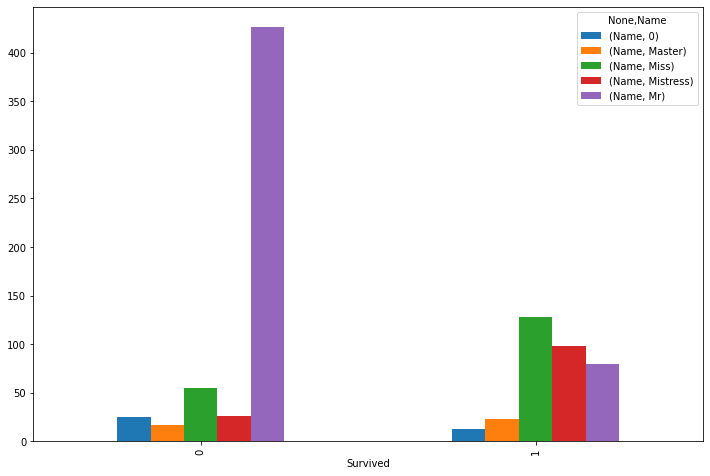

In [54]:
# Plot the distribution of titles into survide and dead categories 
def plot_distribution_titles(dataframe):
    """
    Plot the distribution of passengers based on their title

    Parameters:
    ----------
    dataframe: training dataset Titanic with the names modified to titles
    """
    data = dataframe.groupby(['Survived', 'Name'])[['Name']].count().unstack()
    data.plot.bar(figsize = (12, 8))
plot_distribution_titles(data)


### 3.2. Binning
* fares (custom)
* age (qbins)

In [55]:
# Fares
def fares(dataframe):
    """
    Hotecondes the fares into five different groups

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    bins_fares = [-1, 7.92, 14.5, 32, 100, np.inf]
    names_fares = [0, 1, 2, 3, 4]
    dataframe['Fare_ranges'] = pd.cut(dataframe['Fare'], bins_fares,
                               labels = names_fares)
    return dataframe, bins_fares


In [56]:
data, bins_fares = fares(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Master,Miss,Mrs,Mr,uncommon,Fare_ranges
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,Mistress,female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,3
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,1


In [57]:
def ages(dataframe):
    """
    Hotencodes ages into four different groups using pandas qbins function

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].mean())
    qbins = pd.qcut(dataframe['Age'], q = 4)
    qbins = pd.get_dummies(qbins)
    qbins.columns = ['qbin_Age1', 'qbin_Age2', 'qbin_Age3', 'qbin_Age4']
    dataframe = pd.concat([dataframe, qbins], axis =1)
    return dataframe

In [58]:
data = ages(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mrs,Mr,uncommon,Fare_ranges,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,1,0,0,0
1,2,1,1,Mistress,female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,3,0,0,0,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,1,0,0


### 3.3. Scalling
**Not my favorite**. It seems that digregating the scores in different columns helps to increase the accuracy. 

### 3.4. Into numeric
* sex

In [59]:
def gender(dataframe):
    """
    Hotencodes gender to either male or female

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe.loc[(dataframe['Sex'] == 'male'), 'Sex'] = 0
    dataframe.loc[(dataframe['Sex'] == 'female'), 'Sex'] = 1
    return dataframe

In [60]:
data = gender(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mrs,Mr,uncommon,Fare_ranges,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,1,0,0,0
1,2,1,1,Mistress,1,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,3,0,0,0,1
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,1,0,0


### 3.5. Interactions 
- Age per class

In [61]:
def age_per_class(dataframe, bins_fares):
    """
    Hotecondes ages per travelling class into five different groups

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe['int_Age*Pclass'] = dataframe['Age'] * dataframe['Pclass']
    qbins = pd.qcut(dataframe['int_Age*Pclass'], q=4)
    qbins = pd.get_dummies(qbins)
    qbins.columns=['qbin_SexClass1', 'qbin_SexClass2', 'qbin_SexClass3', 'qbin_SexClass4']
    dataframe = pd.concat([dataframe, qbins], axis = 1)
    bins_Ages = [-1, 22, 29, 35, 60, np.inf]
    names_fares = [1, 2, 3, 4, 5]
    dataframe['Age_ranges'] =  pd.cut(dataframe['Age'], bins_fares, labels=names_fares)
    return dataframe

In [62]:
data = age_per_class(data, bins_fares)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4,int_Age*Pclass,qbin_SexClass1,qbin_SexClass2,qbin_SexClass3,qbin_SexClass4,Age_ranges
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,66.0,0,0,1,0,3
1,2,1,1,Mistress,1,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,38.0,1,0,0,0,4
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,78.0,0,0,1,0,3


In [63]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          2
unk_Cabin         0
Cabin_A           0
Cabin_B           0
Cabin_C           0
Cabin_D           0
Cabin_E           0
Cabin_F           0
Cabin_G           0
Cabin_T           0
Master            0
Miss              0
Mrs               0
Mr                0
uncommon          0
Fare_ranges       0
qbin_Age1         0
qbin_Age2         0
qbin_Age3         0
qbin_Age4         0
int_Age*Pclass    0
qbin_SexClass1    0
qbin_SexClass2    0
qbin_SexClass3    0
qbin_SexClass4    0
Age_ranges        0
dtype: int64

#### Remove columns not to be engineered and save to file

In [139]:
def clear_engineer(dataframe, columns, data_type):
    """
    clear dataframe for a list containing the name of columns that will not be
    used as classifiers for the evaluation and prediction

    Parameters:
    ----------
    dataframe: Data from the Titanic dataset. Either training or test data
    data_type: training, test
    """
    if data_type == "training":
        dataframe.drop(columns, axis = 1, inplace = True)
        dataframe.to_csv('../data/train_featured.csv', index=False)
    else: 
        dataframe.drop(columns, axis = 1, inplace = True)
        dataframe.to_csv('../data/test_featured.csv', index=False)
    return dataframe

In [65]:
columns = ['Age', 'Name', 'Fare',  'Ticket', 'Cabin', 'Embarked', 'int_Age*Pclass']
data = clear_engineer(data, columns)
data.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,unk_Cabin,Cabin_A,Cabin_B,Cabin_C,...,Fare_ranges,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4,qbin_SexClass1,qbin_SexClass2,qbin_SexClass3,qbin_SexClass4,Age_ranges
0,1,0,3,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,3
1,2,1,1,1,1,0,0,0,0,1,...,3,0,0,0,1,1,0,0,0,4
2,3,1,3,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,3


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Sex             891 non-null    object  
 4   SibSp           891 non-null    int64   
 5   Parch           891 non-null    int64   
 6   unk_Cabin       891 non-null    uint8   
 7   Cabin_A         891 non-null    uint8   
 8   Cabin_B         891 non-null    uint8   
 9   Cabin_C         891 non-null    uint8   
 10  Cabin_D         891 non-null    uint8   
 11  Cabin_E         891 non-null    uint8   
 12  Cabin_F         891 non-null    uint8   
 13  Cabin_G         891 non-null    uint8   
 14  Cabin_T         891 non-null    uint8   
 15  Master          891 non-null    uint8   
 16  Miss            891 non-null    uint8   
 17  Mrs             

In [67]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'unk_Cabin', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Master', 'Miss', 'Mrs', 'Mr',
       'uncommon', 'Fare_ranges', 'qbin_Age1', 'qbin_Age2', 'qbin_Age3',
       'qbin_Age4', 'qbin_SexClass1', 'qbin_SexClass2', 'qbin_SexClass3',
       'qbin_SexClass4', 'Age_ranges'],
      dtype='object')

## `Step 4 Evaluating Classifiers`

In [68]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

### Split the data into train and test set

In [69]:
data = pd.read_csv("../data/train_featured.csv")
y = data['Survived']
X = data.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Define the strategy to proceed with the evaluation

In [70]:
def define_strategy(X_train, y_train):
    plt = matplotlib.pyplot.gcf()
    plt.set_size_inches(12, 8)
    strats = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']
    train_dummy_scores = {}
    
    for clfs in strats:
        if clfs == 'constant':
            dummy_clf = DummyClassifier(strategy = clfs, random_state = 0, constant = 0)
        else: 
            dummy_clf = DummyClassifier(strategy = clfs, random_state = 0)
        dummy_clf.fit(X_train, y_train)
        score = dummy_clf.score(X_train, y_train)
        train_dummy_scores[clfs] = score

    values = list(train_dummy_scores.values())
    ax = sns.stripplot(strats, values); 
    ax.set(xlabel ='strategy', ylabel ='training score')
    plt.savefig('../plots/strategies.jpg')

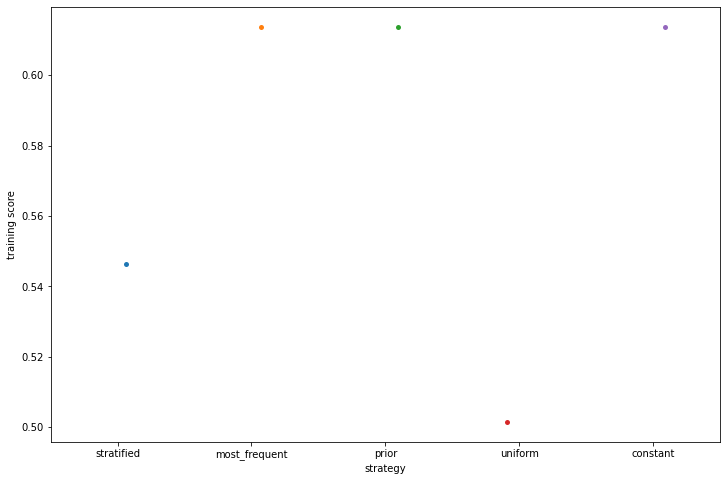

In [71]:
define_strategy(X_train, y_train)

### Build up a dummy classifier based on the prior. This will be of use for contrasting the model. 

In [72]:
def build_dummy():
    dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 0)
    dummy_clf.fit(X_train, y_train)
    dummy_clf.score(X_train, y_train)
    return dummy_clf

In [73]:
dummy_clf = build_dummy()

### Build simple logistic regression model

In [74]:
def simple_regression(training_cols):
    model = LogisticRegression(C=0.1, max_iter = 1000)
    model.fit(X_train[training_cols], y_train)
    score = model.score(X_train[training_cols], y_train)
    model.predict(X_train[training_cols]) 
    coef = model.coef_
    intercept = model.intercept_
    return coef, intercept, score, model

In [75]:
columns = [ 'Mrs', 'Miss', 'Age_ranges', 'Pclass', 'Sex', 'SibSp', 'qbin_Age2', 'Parch', 'Cabin_C']

coef, intercept, score, model = simple_regression(columns)
print("Simple regression results:\nscore: " + str(score), \
      "\ncoef: " + str(coef), "\nintercept: " + str(intercept))

Simple regression results:
score: 0.8146067415730337 
coef: [[ 0.26496611  0.74894783 -0.53444383 -0.93171712  1.85155968 -0.3674573
  -0.11073946  0.04870545 -0.08861103]] 
intercept: [2.73189684]


### Calculate the accuracy of the build model 

In [76]:
def accuracy(X_train, training_cols):
    y_pred_dummy = dummy_clf.predict(X_train)
    y_pred_lr = model.predict(X_train[training_cols])
    accuracy = accuracy_score(y_train, y_pred_lr)    
    return accuracy, y_pred_lr

In [77]:
accuracy, y_pred_lr = accuracy(X_train, columns)
accuracy

0.8146067415730337

In [78]:
coef, intercept

(array([[ 0.26496611,  0.74894783, -0.53444383, -0.93171712,  1.85155968,
         -0.3674573 , -0.11073946,  0.04870545, -0.08861103]]),
 array([2.73189684]))

### Check the types of Errors and the Confusion Matrix

In [79]:
def confusion_matrix_(model, training_cols, X_train, y_train): 
    titles_options = [("without_normalization", None),
                      ("Normalized", 'true')]
    class_names = training_cols
    for i in range(0, 2):
        titles = titles_options[i]
        if i == 0: 
            disp = plot_confusion_matrix(model, X_train[columns], y_train, 
                                         cmap=plt.cm.Blues,
                                         normalize=None)
        else: 
            disp = plot_confusion_matrix(model, X_train[columns], y_train, 
                                 cmap=plt.cm.Blues,
                                 normalize='true')    
        name = (titles_options[i][0], "confussion_matrix")
        name = "_".join(name) 
        disp.ax_.set_title(name)
        print(name)
        print(disp.confusion_matrix)
        plt.savefig('../plots/'+name, format ="jpg")

without_normalization_confussion_matrix
[[388  49]
 [ 83 192]]
Normalized_confussion_matrix
[[0.88787185 0.11212815]
 [0.30181818 0.69818182]]


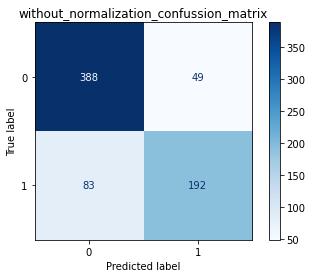

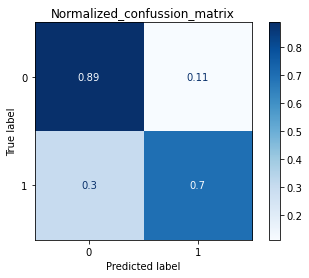

In [80]:
confusion_matrix_(model, columns, X_train, y_train)

### Calculate the precision (positive predictive value) and recall (sensitivity) of the model

In [81]:
def precision_recall(y_train, y_pred_lr): 
    precision = precision_score(y_train, y_pred_lr)
    recall = recall_score(y_train, y_pred_lr)
    return precision, recall

In [82]:
precision, recall = precision_recall(y_train, y_pred_lr)
precision, recall

(0.7966804979253111, 0.6981818181818182)

### Calculate the F1 score (harmonic mean of precision and recall) as a measure of a test's accuracy

In [83]:
F1 = 2 * (precision*recall)/(precision+recall)
F1

0.744186046511628

## `Step 5: Evaluating the model (Cross - validation)`

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
cross_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

In [86]:
cross_scores

array([0.77622378, 0.83216783, 0.81690141, 0.81690141, 0.82394366])

In [87]:
cross_scores.mean().round(3), cross_scores.std()

(0.813, 0.019338268225881753)

### Note: The results from the cross validation suggest overfitting of the data

## `Step 6: Hyperparameter Optimization`

In [88]:
from sklearn.ensemble import RandomForestClassifier 

In [144]:
def hyperparam_optimization(X_train, y_train):
    model_rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = 3, min_samples_split = 2)
    param_grid = {
    'n_estimators': [1, 3, 10, 20, 50, 100],
    'max_depth':[1, 3, 5, 10, None]
    }
    gridcv = GridSearchCV(model_rf, param_grid = param_grid )
    gridcv.fit(X_train, y_train)
    columns = ['mean_test_score', 'std_test_score', 'mean_fit_time', \
            'param_max_depth', 'param_n_estimators']
    results_gridcv = pd.DataFrame(gridcv.cv_results_)
    results_gridcv[columns].sort_values('mean_test_score', ascending=False)
    random_forest = RandomForestClassifier(n_estimators=100, max_depth = 10, max_features =3)
    random_forest.fit(X_train, y_train)
    y_prediction = random_forest.predict(X_train)
    random_forest.score(X_train, y_train)
    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
    return results_gridcv, acc_random_forest, random_forest

In [145]:
gridcv_res, random_forest_res, rf_model = hyperparam_optimization(X_train, y_train)

In [146]:
importance_features = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": random_forest.feature_importances_}
    ).sort_values(by="Importance", ascending=False)
importance_features

,Feature,Importance
17,uncommon,0.150992
1,Sex,0.141034
2,SibSp,0.093021
18,Fare_ranges,0.092252
0,Pclass,0.072508
15,Mrs,0.055609
16,Mr,0.047278
4,unk_Cabin,0.045780
23,qbin_SexClass1,0.043013
3,Parch,0.042508


### `Run the model on the TEST data`
__Using the logistic regression model__

In [107]:
model.fit(X_train, y_train)
print('training score: ', model.score(X_train, y_train).round(3))
print('test score    : ', model.score(X_test, y_test).round(3))

training score:  0.829
test score    :  0.804


__Using the random forest model__

In [148]:
print('training score: ', rf_model.score(X_train, y_train).round(3))
print('test score    : ', rf_model.score(X_test, y_test).round(3))

training score:  0.917
test score    :  0.804


### What would happen if the first 8 features are used instead for the random forest?
__Answer:__ It is very likely that it will improve the cosnsitency betwween train and test

In [167]:
best_8 = importance_features["Feature"].values[:8]
X_train2 = X_train[best_8] 
X_test2 = X_test[best_8]

In [168]:
gridcv_res, random_forest_res, rf_model = hyperparam_optimization(X_train2, y_train)

In [169]:
random_forest_res

85.53

In [170]:
print('training score: ', rf_model.score(X_train2, y_train).round(3))
print('test score    : ', rf_model.score(X_test2, y_test).round(3))

training score:  0.855
test score    :  0.821


## `Step 7: Run the model on the TEST data from kaggle`
### Feature engineer the test data from kaggle

In [147]:
pred  = pd.read_csv('../data/test.csv')
pred = cabin_names(pred, "test")
pred =  name_to_titles(pred)
pred, pred_bins_fares = fares(pred)
pred =  gender(pred)
pred =  ages(pred)
pred =  age_per_class(pred, pred_bins_fares)
columns = [ 'Mrs', 'Miss', 'Age_ranges', 'Pclass', 'Sex', 'SibSp', 'qbin_Age2', 'Parch', 'Cabin_C']
pred =  clear_engineer(pred, columns, "test")
pred

,PassengerId,Name,Age,Ticket,Fare,Cabin,Embarked,unk_Cabin,Cabin_A,Cabin_B,...,uncommon,Fare_ranges,qbin_Age1,qbin_Age3,qbin_Age4,int_Age*Pclass,qbin_SexClass1,qbin_SexClass2,qbin_SexClass3,qbin_SexClass4
0,892,Mr,34.50000,330911,7.8292,0,2,1,0,0,...,1,0,0,1,0,103.500000,0,0,0,1
1,893,Mistress,47.00000,363272,7.0000,0,1,1,0,0,...,0,0,0,0,1,141.000000,0,0,0,1
2,894,Mr,62.00000,240276,9.6875,0,2,1,0,0,...,1,1,0,0,1,124.000000,0,0,0,1
3,895,Mr,27.00000,315154,8.6625,0,1,1,0,0,...,1,1,0,0,0,81.000000,0,0,1,0
4,896,Mistress,22.00000,3101298,12.2875,0,1,1,0,0,...,0,1,1,0,0,66.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Mr,30.27259,A.5. 3236,8.0500,0,1,1,0,0,...,1,1,0,0,0,90.817771,0,0,1,0
414,1306,0,39.00000,PC 17758,108.9000,C,0,0,0,0,...,0,4,0,0,1,39.000000,1,0,0,0
415,1307,Mr,38.50000,SOTON/O.Q. 3101262,7.2500,0,1,1,0,0,...,1,0,0,0,1,115.500000,0,0,0,1
416,1308,Mr,30.27259,359309,8.0500,0,1,1,0,0,...,1,1,0,0,0,90.817771,0,0,1,0
